# Project 1
## Cardiovascular Disease and Risk Factors
### Team 6
* Andrew Sooklall
* Varun Athreya
* Robert Mendoza
* Zane Lynch
* Guisha Ceus



In [9]:
#import dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import urllib

#import extras
import requests
from scipy.stats import linregress
import time

#import api
import gmaps

# Import API key
from config import weather_api_key, g_key

In [2]:
import pandas_profiling

In [3]:
#import CSV(s)
base_df = pd.read_csv("Resources/cvd_per_100k.csv")
base_df

,Location,Capital,Male Deaths,Female Deaths,Total Deaths,Cigarette Users,Hypertension,Obesity
0,Alabama,Montgomery,283.0,175.5,458.5,20900,41900,37100
1,Alaska,Juneau,172.5,99.4,271.9,21000,31800,34700
2,Arizona,Phoenix,178.4,109.8,288.2,15600,30700,30100
3,Arkansas,Little Rock,277.8,178.9,456.7,22300,41300,36000
4,California,Sacramento,181.2,111.4,292.6,11300,28400,25700
5,Colorado,Denver,153.1,97.4,250.5,14600,25900,23100
6,Connecticut,Hartford,178.5,113.4,291.9,12700,30500,27500
7,Delaware,Dover,197.1,127.3,324.4,17000,34900,32400
8,District of Columbia,District of Colombia,243.5,149.2,392.7,14300,26700,23000
9,Florida,Honolulu,186.2,111.6,297.8,16100,34600,28900


In [5]:
base_df.drop(columns=['Male Deaths', 'Female Deaths']).profile_report()

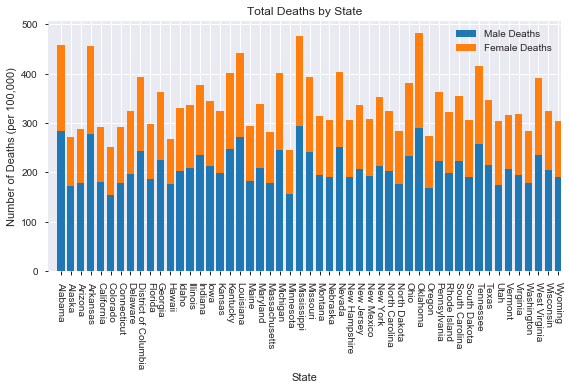

In [30]:
base_df[['Male Deaths', 'Female Deaths']].plot(kind='bar', rot=-90, width=0.75, stacked=True)
plt.xticks(np.arange(len(base_df)), list(base_df['Location']))
plt.xlim(-1.25, len(base_df)-0.75)
plt.title('Total Deaths by State')
plt.xlabel('State')
plt.ylabel('Number of Deaths (per 100,000)')
plt.tight_layout(pad=1)

plt.show()

In [31]:
print('%20')

%20


In [39]:
test = base_df['Capital'][8].replace(' ', '%20')
print(test)

District%20of%20Colombia


In [40]:
district = base_df['Capital'][8]
print(district)

District of Colombia


In [44]:
requests.get(f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={district}')

<Response [404]>

In [43]:
district = base_df['Capital'][8]
response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={test}')
response.json()

{'cod': '404', 'message': 'city not found'}

In [10]:
lat_list = []
lng_list = []

for x in base_df['Capital']:
    
    response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={city}')
    if(str(response) == '<Response [200]>'):
        lat_list.append(response.json()['coord']['lat'])
        lng_list.append(response.json()['coord']['lon'])
    else:
        print(f'{x} not found. Skipping...')
    time.sleep(1)

AttributeError: module 'urllib' has no attribute 'urlencode'